In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from kmodes import kmodes
from sklearn.cluster import KMeans
from matplotlib import pyplot
import pylab as pl
from sklearn.decomposition import PCA
import random
from scipy.spatial.distance import cdist,pdist
moviesdf = pd.read_csv('./ml100k/u.item', header=None,sep='|')
moviesdf1 = pd.read_csv('./ml100k/movies.csv')
ratingsdf = pd.read_csv('./ml100k/ratings.csv')
ratingsdf=ratingsdf.groupby('movieId').filter(lambda x: len(x) >= 10)
ratingsdf=ratingsdf.reset_index(drop=True)
print moviesdf1.genres

0           Adventure|Animation|Children|Comedy|Fantasy
1                            Adventure|Children|Fantasy
2                                        Comedy|Romance
3                                  Comedy|Drama|Romance
4                                                Comedy
5                                 Action|Crime|Thriller
6                                        Comedy|Romance
7                                    Adventure|Children
8                                                Action
9                             Action|Adventure|Thriller
10                                 Comedy|Drama|Romance
11                                        Comedy|Horror
12                         Adventure|Animation|Children
13                                                Drama
14                             Action|Adventure|Romance
15                                          Crime|Drama
16                                        Drama|Romance
17                                              

In [ ]:
cols_to_be_repeated = ["movieId", "title"]
splitdf = lambda x: x.split('|')
s = moviesdf1.genres.str.split("|").apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
del moviesdf1['genres']
moviesdfnew=moviesdf1.join(pd.DataFrame(s))
print moviesdfnew



      movieId                                              title            0
0           1                                   Toy Story (1995)    Adventure
0           1                                   Toy Story (1995)    Animation
0           1                                   Toy Story (1995)     Children
0           1                                   Toy Story (1995)       Comedy
0           1                                   Toy Story (1995)      Fantasy
1           2                                     Jumanji (1995)    Adventure
1           2                                     Jumanji (1995)     Children
1           2                                     Jumanji (1995)      Fantasy
2           3                            Grumpier Old Men (1995)       Comedy
2           3                            Grumpier Old Men (1995)      Romance
3           4                           Waiting to Exhale (1995)       Comedy
3           4                           Waiting to Exhale (1995)

In [ ]:
moviesdfnew.columns = ['movieId','title','genres']


In [ ]:
df=pd.get_dummies(moviesdfnew['genres'])
print df

      (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                      0       0          1          0         0       0   
0                      0       0          0          1         0       0   
0                      0       0          0          0         1       0   
0                      0       0          0          0         0       1   
0                      0       0          0          0         0       0   
1                      0       0          1          0         0       0   
1                      0       0          0          0         1       0   
1                      0       0          0          0         0       0   
2                      0       0          0          0         0       1   
2                      0       0          0          0         0       0   
3                      0       0          0          0         0       1   
3                      0       0          0          0         0       0   
3           

In [ ]:
moviesdf2=df.groupby(df.index).sum()
print moviesdf2
movies=moviesdf1.join(moviesdf2, lsuffix='_moviesdf1', rsuffix='_moviedsf2')

      (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                      0       0          1          1         1       1   
1                      0       0          1          0         1       0   
2                      0       0          0          0         0       1   
3                      0       0          0          0         0       1   
4                      0       0          0          0         0       1   
5                      0       1          0          0         0       0   
6                      0       0          0          0         0       1   
7                      0       0          1          0         1       0   
8                      0       1          0          0         0       0   
9                      0       1          1          0         0       0   
10                     0       0          0          0         0       1   
11                     0       0          0          0         0       1   
12          

In [ ]:

titles = movies
titles1 = titles.drop(titles.columns[[0, 1]], axis=1, inplace=True)
#print titles
titles1 = titles.as_matrix()
#print titles1[0,3]
#print titles1[0,3]
#print titles1[0,3]
#print titles1


In [ ]:
def withinss(km): 
    centroids =(km.cluster_centers_)
    D_k = [cdist(titles, centroids, 'euclidean')]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/titles.shape[0] for d in dist]
    return avgWithinSS




In [18]:
def clusterFilms(titles):
    random.seed(101)
    i = 1
    while(1):
        i = i+1
        movieCluster1 = KMeans(n_clusters=i,n_init=1).fit(titles)
        movieCluster2 = KMeans(n_clusters=i+1, n_init=1).fit(titles)
        #movieCluster1 = kmodes.KModes(n_clusters=i, init='Huang', n_init=5, verbose=1).fit(titles)
        #movieCluster2 = kmodes.KModes(n_clusters=i+1, init='Huang', n_init=5, verbose=1).fit(titles)
        ss1 = withinss(movieCluster1)
        ss2 = withinss(movieCluster2)
        print ss1
         #decision criterion
        dss = (ss1[0]-ss2[0])/ss1[0]
        #exit if dss < 0.2
        if (dss < 0.2): 
            #pyplot.plot(movieCluster1)
            #pyplot.show()
            pca = PCA(n_components=i).fit(titles)
            pca_2d = pca.transform(titles)
            print pca_2d
            print i
            for j in range(0, pca_2d.shape[0]):
                if movieCluster1.labels_[j] == 0:
                     c1 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='r',
                     marker='+')
                if movieCluster1.labels_[j]==1:
                      c2 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='b',
                     marker='*')
                if movieCluster1.labels_[j]==2:
                      c2 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='g',
                     marker='o')
            pl.show()
            break
    return(movieCluster1)
        

In [ ]:
#moviecluster=clusterFilms(titles)

#ratingsdf.head()
def getUserInfo(ratingsdf,id):
    df = ratingsdf[ratingsdf.userId == id][['movieId','rating']]
    a=pd.DataFrame(df.sort('movieId'))
    a=a.reset_index(drop=True)    
    return a


In [ ]:
def setcluster(moviecluster,a):
    df1=pd.DataFrame(moviesdf1.movieId)
    df1['clusterno'] = moviecluster.labels_
    df2 = df1[df1.movieId.isin(a.movieId)]
    df2=df2.reset_index(drop=True)
    a['cluster']=df2.clusterno

    return a

In [ ]:
def getmeanratings(a):
    b=pd.DataFrame(a.groupby(a.cluster)['rating'].mean())
    
    c = b[b.rating==max(b.rating)].index
    #print c
    return c


In [ ]:
def getrecommendedfilms(c,moviecluster,moviesdf1,a,ratingsdf):
    df1=pd.DataFrame(moviesdf1.movieId)
    df1['clusterno'] = moviecluster.labels_
    df3=df1[df1.clusterno.isin(c)][['movieId']]
    df3 = df3.reset_index(drop=True)
    df3 = df3[~df3.movieId.isin(a.movieId)]
    df3 = df3.reset_index(drop=True)
    d = ratingsdf[ratingsdf.movieId.isin(df3.movieId)]
#b=pd.DataFrame(a.groupby(a.cluster)['rating'].mean())
    d = d.reset_index(drop=True)
    r=pd.DataFrame(d.groupby(d.movieId)['rating'].mean())
    t=moviesdf1[moviesdf1.movieId.isin(r.index)]['title']
    t.index = r.index
    r['title']=t
    #t1=r.sort_values(by='rating',ascending=False)
    #return t1
    return r.sort_values(by='rating',ascending=False)


In [ ]:
def recommend(titles,moviesdf1,ratingsdf,userid,number):
    moviecluster = clusterFilms(titles)
    activeuser = getUserInfo(ratingsdf,userid)
    activeuser = setcluster(moviecluster,activeuser)
    cluster = getmeanratings(activeuser)
    recommend = getrecommendedfilms(cluster,moviecluster,moviesdf1,activeuser,ratingsdf)
#     pcaa = PCA(n_components=2).fit(recommend)
#     pca_2d = pcaa.transform(recommend)
#     for j in range(0, pca_2d.shape[0]):
#                 if cluster.labels_[j] == 0:
#                      c1 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='r',
#                      marker='+')
#                 if cluster.labels_[j]==1:
#                       c2 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='b',
#                      marker='*')
#                 if cluster.labels_[j]==2:
#                       c2 = pl.scatter(pca_2d[j,0],pca_2d[j,1],c='g',
#                      marker='o')
#     pl.show()
    top = recommend.head(n = 50).sort_values(by='rating',ascending=False)
    
    
    return top.sample(number)
    

[1.1240889944414141]
[[ 1.09984504  0.20150265]
 [ 0.36644261  0.50409885]
 [ 0.82587398 -0.50183183]
 ..., 
 [ 0.13989291  0.21985472]
 [ 0.77189266 -0.1675789 ]
 [ 0.13989291  0.21985472]]
2


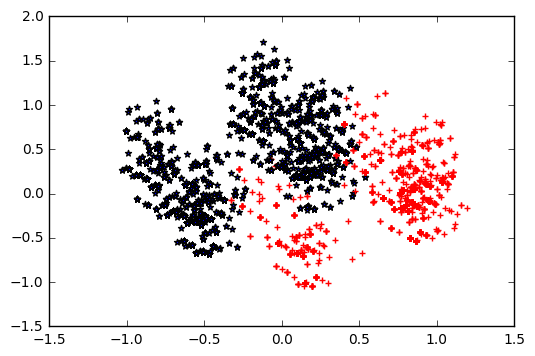

Int64Index([1], dtype='int64', name=u'cluster')


c:\python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,rating,title
movieId,,
926,4.434211,All About Eve (1950)
1931,4.250000,Mutiny on the Bounty (1935)
1927,4.285714,All Quiet on the Western Front (1930)
2357,4.318182,Central Station (Central do Brasil) (1998)
1209,4.218750,Once Upon a Time in the West (C'era una volta ...
5971,4.230769,My Neighbor Totoro (Tonari no Totoro) (1988)
1217,4.423077,Ran (1985)
6016,4.297101,City of God (Cidade de Deus) (2002)
1719,4.195652,"Sweet Hereafter, The (1997)"


In [19]:
recommend(titles,moviesdf1,ratingsdf,30,10)
